In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv("Births2015.csv")
df.head()

,Unnamed: 0,date,births,wday,year,month,day_of_year,day_of_month,day_of_week
0,1,2015-01-01,8068,Thu,2015,1,1,1,5
1,2,2015-01-02,10850,Fri,2015,1,2,2,6
2,3,2015-01-03,8328,Sat,2015,1,3,3,7
3,4,2015-01-04,7065,Sun,2015,1,4,4,1
4,5,2015-01-05,11892,Mon,2015,1,5,5,2


In [4]:
df.shape

(365, 9)

In [5]:
df.isna().any()

Unnamed: 0      False
date            False
births          False
wday            False
year            False
month           False
day_of_year     False
day_of_month    False
day_of_week     False
dtype: bool

In [6]:
df.describe()

,Unnamed: 0,births,year,month,day_of_year,day_of_month,day_of_week
count,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000
mean,183.000000,10899.991781,2015.0,6.526027,183.000000,15.720548,4.002740
std,105.510663,2076.683881,0.0,3.452584,105.510663,8.808321,2.000685
min,1.000000,6515.000000,2015.0,1.000000,1.000000,1.000000,1.000000
25%,92.000000,8431.000000,2015.0,4.000000,92.000000,8.000000,2.000000
50%,183.000000,11883.000000,2015.0,7.000000,183.000000,16.000000,4.000000
75%,274.000000,12339.000000,2015.0,10.000000,274.000000,23.000000,6.000000
max,365.000000,13949.000000,2015.0,12.000000,365.000000,31.000000,7.000000


In [7]:
type(df)
#df['births'].unique()
df.mean()

C:\Users\ABDURR~1\AppData\Local\Temp/ipykernel_14936/1434685731.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Unnamed: 0        183.000000
births          10899.991781
year             2015.000000
month               6.526027
day_of_year       183.000000
day_of_month       15.720548
day_of_week         4.002740
dtype: float64

<AxesSubplot:>

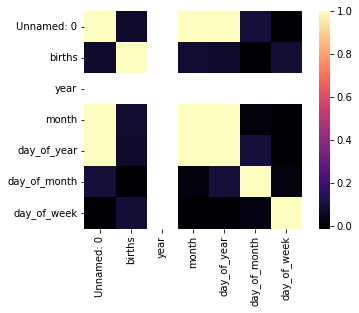

In [18]:
import seaborn as sns
correlation = df.corr()
correlation
sns.heatmap(data=correlation, square=True, cmap="magma")
